In [1]:
import hapi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
#I neeed to do this process for the line analysis
def convertCMtoUM(cm):#Convrets cm^-1 to microns
   return 10000/cm 
def dipFinder(filePath):#filePath is the exoplanet csv file. MOlecule is just the name of the molecule to find dips.
    df=pd.read_csv(filePath)
    wavelengths=df["CENTRALWAVELNG"]
    transitDepths=df["PL_TRANDEP"]
    # dipIndexes=np.where(derivative<0)[0]
    dipIndexes=np.where((transitDepths < np.roll(transitDepths, 1)) & (transitDepths < np.roll(transitDepths, -1)))[0]
    dipLocation=[wavelengths[i] for i in dipIndexes]#Gets what wavelength they are at
    dipValue=[transitDepths[i] for i in dipIndexes]#Gets the transit detph at that point
    return (dipLocation,dipValue)

def getRad(filePath):
    df=pd.read_csv(filePath)
    planetRad=list(df["PL_RADJ"])
    starRad=list(df["ST_RAD"])
    return (np.average(planetRad),starRad[0])#Since starRad doesn't change

# def likelihoodH1(observed,expected,uncertainty):
#     likelihood=0
#     for index in range(len(observed)):
#         obs=observed[index]
#         exp=expected[index]
#         constant=-1*math.log(math.sqrt(2*math.pi)*uncertainty)
#         param=math.exp(-1*(obs-exp)**2 / (2*(uncertainty**2)))
#         likelihood+=param-constant
#     return likelihood



test=hapi.fetch('CO2',2,1,1500,5000)
nu,coef = hapi.absorptionCoefficient_Lorentz(SourceTables='CO2',HITRAN_units=False)
nu,trans = hapi.transmittanceSpectrum(nu,coef)
wavelengths=[]

for value in nu:
    wavelengths.append(convertCMtoUM(value))

#"C:\Users\Tristan\Downloads\table_K2-18-b-Madhusudhan-et-al.-2023 (1).csv"
#"C:\Users\Tristan\Downloads\table_HAT-P-18-b-Fu-et-al.-2022.csv"
location,depth=dipFinder(r"C:\Users\Tristan\Downloads\table_K2-18-b-Madhusudhan-et-al.-2023 (1).csv")

observedWavelength=[]
observedTransit=[]

expectedWavelength=[]
expectedTransit=[]


for i,value in enumerate(depth):#Converting into transmittance
    depth[i]=1-(value/100)

for index,value in enumerate(location):#Finds matching dips and lines, wavelengths must be close and transmittance must be close
    print(index)
    closestMatchingValue=min(wavelengths,key=lambda x:abs(x-value))
    # print(closestMatchingValue-value)
    wavelengthIndex=wavelengths.index(closestMatchingValue)

    if abs(closestMatchingValue-value)<=0.001:
        observedWavelength.append(value)
        observedTransit.append(depth[index])

        expectedWavelength.append(closestMatchingValue)
        expectedTransit.append(trans[wavelengthIndex])


#Just need to fix up likelihood function to actually work
# print(wavelength)
# plt.plot(wavelength,trans)
#CH4: 0.6
#CO2: 0.7455516014234875
#NH3: 0.45

HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [249]:
count1=0
count2=0
for i,value in enumerate(observedTransit):
    if abs(value-expectedTransit[i])<0.01:
        count1+=1
    else:
        count2+=1
print(f"{count1} values are quite close")
print(f"{count2} are not close")
'''
CO2: 838 values are quite close
286 are not close

CH4: 683 values are quite close
441 are not close

NH3: 513 values are quite close
611 are not close

H2O: 671 values are quite close
453 are not close

'''


print(observedTransit)
print(expectedTransit)

513 values are quite close
611 are not close
[0.9976574, 0.9975482, 0.9968047, 0.9976729, 0.9970766, 0.9973801, 0.9982323, 0.9978305, 0.997592, 0.9980854, 0.9975561, 0.9982648, 0.9975147, 0.9977036, 0.9970617, 0.9969908, 0.9976517, 0.9984282, 0.9983091, 0.9972988, 0.9978334, 0.9972746, 0.9970858, 0.9973316, 0.9970578, 0.9978242, 0.9971236, 0.9973298, 0.9975468, 0.9970312, 0.9973486, 0.9971332, 0.9971837, 0.9972372, 0.9974415, 0.9970427, 0.9970897, 0.9973776, 0.9967679, 0.9973003, 0.9970063, 0.9971419, 0.9971029, 0.9974351, 0.9974108, 0.9972457, 0.9970326, 0.9971648, 0.9973784, 0.9970128, 0.9967845, 0.9970841, 0.9974802, 0.9971154, 0.9974863, 0.9972812, 0.9971402, 0.997302, 0.9976184, 0.9972432, 0.997105, 0.9972634, 0.9973374, 0.9974144, 0.9974457, 0.9973599, 0.9971277, 0.9970623, 0.9978065, 0.9973413, 0.9974361, 0.9981641, 0.9974812, 0.9972447, 0.9972107, 0.997321, 0.9973567, 0.997567, 0.9973874, 0.9975674, 0.997099, 0.9975258, 0.9975668, 0.9972243, 0.9970318, 0.9971122, 0.9977348, 0.9

In [5]:
from scipy.stats import bernoulli
def prior_probability(p):
    # Define prior probability distribution using Bernoulli distribution
    return bernoulli.pmf(p, 0.01)  # Assuming equal prior probability for presence and absence


def likelihood(obs, exp, moleculePresent=True):
    differences = np.abs(np.array(exp) - np.array(obs))
    likelihoods = []
    for value in differences:
        # Define a weighting function based on the magnitude of differences
        weight = 1/(1 + value)  # Example weighting function
        if moleculePresent:
            if value<=0.01:
                likelihoods.append(weight+0.1)  # Adjust likelihood based on weight
            else:
                likelihoods.append(weight*0.99)
        else:
            if value<=0.01:
                likelihoods.append(weight*0.99)  # Adjust likelihood based on weight
            else:
                likelihoods.append(weight+0.1)
    return np.prod(likelihoods)

def compute_posterior(observed_values, expected_values, molecule_present=True):
    # Compute likelihood
    likelihood_value = likelihood(observed_values, expected_values, moleculePresent=molecule_present)
    # Compute prior probability
    prior_prob = prior_probability(1 if molecule_present else 0)
    # Compute posterior probability using Bayes' theorem
    posterior_prob = (likelihood_value * prior_prob) / (likelihood(observed_values, expected_values, moleculePresent=True) * prior_probability(1) + likelihood(observed_values, expected_values, moleculePresent=False) * prior_probability(0))
    return posterior_prob

#Can still use intensity z-score as cutoff

print(compute_posterior(observedTransit,expectedTransit,True))
print(compute_posterior(observedTransit,expectedTransit,False))

2.121866481388828e-07
0.9999997878133519


In [2]:
import numpy as np
import scipy.stats as stats

# Sample data: observed and expected values


# Calculate the deviations from the expected values
deviations =  np.array(expectedTransit)-np.array(observedTransit)

# Prior hyperparameters for the normal-gamma prior
mu_prior = 3 # Prior mean for the deviations (assuming no bias in deviation)
sigma_prior = 1  # Prior standard deviation for the mean (can be adjusted)
alpha_prior = 1  # Prior shape parameter for the gamma distribution (precision)
beta_prior = 1   # Prior rate parameter for the gamma distribution (precision)

# Calculate the mean and variance of the deviations
deviations_mean = np.mean(deviations)
deviations_var = np.var(deviations)

# Calculate the number of observations
n = len(deviations)

# Posterior parameters for the mean (mu) using normal-gamma conjugacy
sigma2_prior = sigma_prior ** 2
sigma2_post = 1 / (n / deviations_var + 1 / sigma2_prior)
mu_post = sigma2_post * (deviations_mean / deviations_var + mu_prior / sigma2_prior)

# Posterior parameters for the precision (tau) using normal-gamma conjugacy
alpha_post = alpha_prior + n / 2
beta_post = beta_prior + 0.5 * np.sum((deviations - deviations_mean) ** 2)

# Calculate the posterior distributions
posterior_mu = stats.norm(loc=mu_post, scale=np.sqrt(sigma2_post))
posterior_tau = stats.gamma(a=alpha_post, scale=1 / beta_post)

# Calculate the probability that molecule is present
# We can use the posterior distribution of mu and set a threshold for presence
# For example, if the mean deviation is significantly different from zero, something may be present
threshold = 0  # Adjust the threshold according to context
prob_present = posterior_mu.sf(threshold)  # Survival function (1 - CDF) of the posterior mu

print(f"Probability that molecule is present: {prob_present:.4f}")


Probability that molecule is present: 0.5067


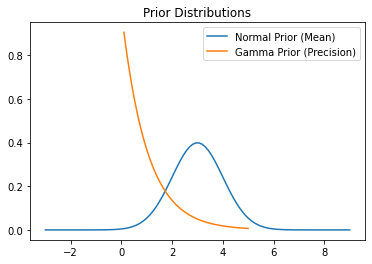

In [4]:
# Plot prior distributions
x = np.linspace(-3, 9, 100)

# Normal prior for the mean
mu_prior_dist = stats.norm(loc=mu_prior, scale=sigma_prior)
plt.plot(x, mu_prior_dist.pdf(x), label='Normal Prior (Mean)')

# Gamma prior for the precision
x = np.linspace(0.1, 5, 100)
tau_prior_dist = stats.gamma(a=alpha_prior, scale=1 / beta_prior)
plt.plot(x, tau_prior_dist.pdf(x), label='Gamma Prior (Precision)')

plt.legend()
plt.title('Prior Distributions')
plt.show()


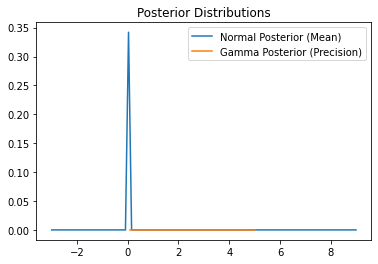

In [5]:
# Plot posterior distributions
x = np.linspace(-3, 9, 100)

# Normal posterior for the mean
mu_post_dist = stats.norm(loc=mu_post, scale=np.sqrt(sigma2_post))
plt.plot(x, mu_post_dist.pdf(x), label='Normal Posterior (Mean)')

# Gamma posterior for the precision
x = np.linspace(0.1, 5, 100)
tau_post_dist = stats.gamma(a=alpha_post, scale=1 / beta_post)
plt.plot(x, tau_post_dist.pdf(x), label='Gamma Posterior (Precision)')

plt.legend()
plt.title('Posterior Distributions')
plt.show()


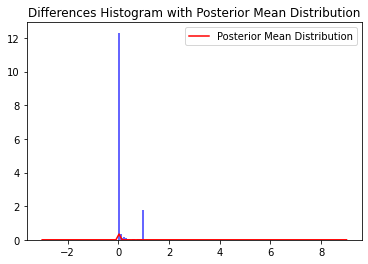

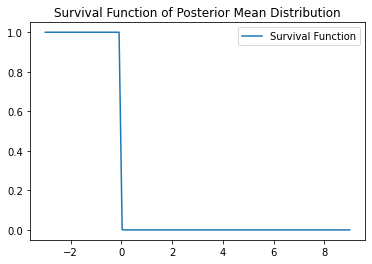

In [11]:
for counter in range(3931,4080):
    combination=('H2O',)
    folderPath=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Training'
    #How should I name the folder?
    folderPath+=f'\{"H2O"}'
    
    star=random.choice(stars)
    radius=random.choice([i for i in range(4000,21000)])
    density=random.choice(densities)
    starDistance=random.choice([a/100 for a in range(10,61)])
    if star=="M":
        starTemp=random.choice(redDwarfTemp)
        starRad=random.choice(redDwarfRad)
    else:
        starTemp=random.choice(yelDwarfTemp)
        starRad=random.choice(yelDwarfRad)
    gravity=calculateGravity(chosenRadius,density)
    parameters={'<OBJECT-DIAMETER>':chosenRadius*2,'<OBJECT-GRAVITY>':gravity,'<OBJECT-STAR-DISTANCE>':starDistance,'<OBJECT-STAR-TYPE>':star,'<OBJECT-STAR-TEMPERATURE>':starTemp,'<OBJECT-STAR-RADIUS>':starRad,'<ATMOSPHERE-NGAS>':len(combination),'<ATMOSPHERE-ABUN>':",".join(["1" for i in range(len(combination))]),'<ATMOSPHERE-UNIT>':",".join(["scl" for i in range(len(combination))])}
    parameters['<ATMOSPHERE-GAS>']=",".join(combination)
    hitranNames=[HITRANValues[a] for a in combination]
    parameters['<ATMOSPHERE-TYPE>']=",".join(hitranNames)


    parameterFolder=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Parameters'
    parameterFile=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Parameters' + f'\{"-".join(combination)}-{counter}'+'.txt'
    createParameterFile(parameters,parameterFile)#Assume that this works

    curlCommand=f'curl -d key=8bd9208abbd2dd15f3dd -d type=trn -d whdr=y --data-urlencode file@"{parameterFile}" https://psg.gsfc.nasa.gov/api.php'
    output=subprocess.check_output(curlCommand,shell=True,text=True)
    with open(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt','w') as dataFile:
        dataFile.write(output)
        extracted=getNumericalData(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt')
        writeToCSV(extracted,folderPath+f'\{"-".join(combination)}-{counter}'+'.csv',[])
        dataFile.close()
    

    

In [13]:
for combination in moleculeSubsets:
    folderPath=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Training'
    #How should I name the folder?
    folderPath+=f'\{"-".join(combination)}'
    print(len([entry for entry in os.listdir(folderPath) if os.path.isfile(os.path.join(folderPath, entry))]))

4080
4080
4080
4080
4080
4080
4080
4080
4080
4080
4080
4080
4080
4080
4080


Width of confidence interval: 0.0382
Absolute difference between observed and expected means: -1.1300
Error as proportion of confidence interval width: 29.5812
Percentage error: 2958.12%


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0